##Paris Housing Price Prediction using SVM Regression with Hyper-Parameter Tuning
###This project aims to predict housing prices in Paris by implementing Support Vector Machine (SVM) Regression, a powerful supervised machine learning algorithm. SVM is known for its ability to handle high-dimensional data and is effective in both classification and regression tasks. For this project, we'll focus on optimizing the SVM model for regression to capture complex relationships within the dataset's features and improve prediction accuracy.

###The dataset, sourced from Kaggle, provides various details about Parisian houses, including variables such as square footage, location specifics, and amenities. The primary objective here is to leverage SVM's kernel functions and fine-tune hyper-parameters such as C, epsilon, and the kernel type to minimize prediction errors and enhance model performance.

###Throughout this notebook, you will find sections covering:

* Data Preprocessing: Handling missing values, scaling, and encoding features if needed to ensure the dataset is compatible with the SVM model.
* Exploratory Data Analysis (EDA): Understanding the distribution of housing prices and feature relationships.
* Model Implementation: Building the SVM regression model and optimizing hyper-parameters using GridSearchCV for better accuracy and generalizability.
* Evaluation: Using metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) to evaluate the tuned model.

###By the end of this project, the goal is to establish a model capable of accurate and reliable price predictions, valuable for potential applications in real estate analytics in urban environments like Paris.

In [1]:
# Data manipulation and visualization
import pandas as pd # It imports the pandas library and assigns it the alias "pd" for easier use.
import numpy as np # It brings in a tool called numpy, nicknamed "np", to help with number crunching in your code.
import matplotlib.pyplot as plt  # Import libraries for creating visualizations, aliased as plt.
import seaborn as sns # Import libraries for creating visualizations, aliased as sns.

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV # It imports functions for splitting data and tuning model hyperparameters for better performance evaluation.
from sklearn.svm import SVR # It imports the Support Vector Regression (SVR) model for performing regression tasks using support vector machines.
from sklearn.preprocessing import StandardScaler # It imports the StandardScaler to standardize features by removing the mean and scaling to unit variance.
from sklearn.metrics import mean_absolute_error, mean_squared_error # It imports functions to calculate Mean Absolute Error (MAE) and Mean Squared Error (MSE) for regression model evaluation.


In [2]:
df = pd.read_csv("ParisHousing..csv") #Loads the data from the CSV file into a pandas DataFrame named df.

In [3]:
df.head() #Displays the first 5 rows of the DataFrame df.

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [4]:
df.info() # It prints a concise summary of the DataFrame, including data types, non-null values, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.isnull().sum() #It calculates and displays the total number of missing values (NaN) in each column of the DataFrame.

,0
squareMeters,0
numberOfRooms,0
hasYard,0
hasPool,0
floors,0
cityCode,0
cityPartRange,0
numPrevOwners,0
made,0
isNewBuilt,0


###Here we can see that there is no null value in the dataframe.

In [7]:
# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price']
# It separates the dataset into features (X) by excluding the 'price' column and assigns 'price' as the target variable (y).

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# It splits the data into training and testing sets (80% train, 20% test) with a fixed random seed for reproducibility.

In [9]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# It standardizes the features (X_train and X_test) using the StandardScaler for better model performance.

In [10]:
# Define the SVM model
svm = SVR()
# It creates an instance of the Support Vector Regression (SVR) model with default parameters.

In [11]:
# Set up the hyper-parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'epsilon': [0.01, 0.1, 0.5, 1],    # Controls tolerance for errors
    'kernel': ['linear', 'poly', 'rbf'] # Kernel type
}

In [12]:
# Grid Search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='neg_mean_squared_error', verbose=2)

In [13]:
# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'epsilon': 0.01, 'kernel': 'linear'}


In [14]:
# Train the model with best parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)


SVR(C=100, epsilon=0.01, kernel='linear')

In [15]:
# Make predictions
y_pred_train = best_svm.predict(X_train)
y_pred_test = best_svm.predict(X_test)


In [16]:
# Evaluation Metrics
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

In [17]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

In [18]:
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")
print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")

Training MAE: 1867534.912031115
Testing MAE: 1953926.1138576742
Training MSE: 4686772995172.952
Testing MSE: 5045879454358.188


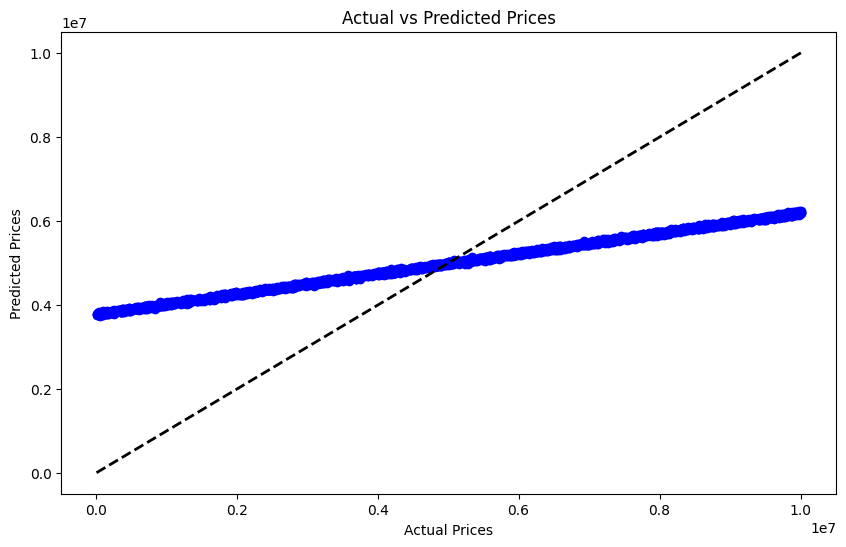

In [19]:
# Plot predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [22]:
from sklearn.metrics import r2_score
rmse = np.sqrt(test_mse)
r2 = r2_score(y_test, y_pred_test)

In [23]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 2246303.508958259
R-squared (R²): 0.4239045554527989
